In [3]:
cd D:\Users\Niels\Documents\Machine learning\python\ING

D:\Users\Niels\Documents\Machine learning\python\ING


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def makeFactorHistogram(factor, signal, minBin, maxBin, nBins):
    # Make a set of bins
    bins = np.linspace(minBin, maxBin, nBins)
    # Assign the factor values to bin numbers
    bin_numbers = np.digitize(factor, bins, right=False)
    
    # Total number of factor points per bin
    total_counts = np.zeros(nBins + 1)
    # Total signal per bin
    signal_counts = np.zeros(nBins + 1)

    # Loop through factor bin values
    for i, v in enumerate(bin_numbers):
        total_counts[v] += 1
        signal_counts[v] += signal[i]

    # Calculate the probability
    bin_probability = np.zeros(nBins + 1)
    for i in range(nBins + 1):
        if total_counts[i] > 0:
            bin_probability[i] = signal_counts[i]/total_counts[i]
        total_counts[i] /= len(bin_numbers)

    return bins, bin_probability, total_counts 

In [7]:
#data = pd.read_csv("train - subsample.csv")
data = pd.read_csv("train.csv")
print(data.head())
data_orig = data
print(data["bankrupt"].sum())
print("Number of lines: {} Default probability: {}".format(len(data.index), data["bankrupt"].sum()/len(data.index)))

   num_employees country                                      industry_desc  \
0          50253      CN  Nonscheduled Chartered Freight Air Transportat...   
1           1847      CN                 Offices of Real Estate Appraisers    
2          16184      CN                 Nuclear Electric Power Generation    
3             25      TR                   Ready-Mix Concrete Manufacturing   
4           4968      CN  Motor Vehicle Electrical and Electronic Equipm...   

   A_score  B_score  C_score  D_score  revenue2014  revenue2015  revenue2016  \
0      3.0      3.0      3.0      3.0          108          396          629   
1      2.0      2.0      4.0      NaN          956          647          513   
2      3.0      4.0      NaN      4.0          901         1930         3022   
3      2.0      2.0      2.0      NaN        11267         7787         6598   
4      NaN      3.0      2.0      5.0         2481         4512         9195   

   bankrupt  
0         0  
1         0  
2 

Number of Industries: 620 Mean No. Occurrences: 472.7774193548387 StDev: 22.220414570864325


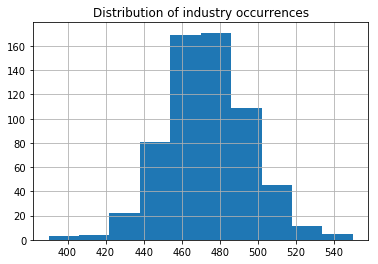

In [8]:
# Explore industries
# Get the list of industries with number of occurrences
industries = pd.value_counts(data["industry_desc"])
n_industries = industries.size
n_data = len(data.index)
print("Number of Industries: {} Mean No. Occurrences: {} StDev: {}".format(n_industries, industries.mean(), industries.std()))

# Histogram of industry occurrences
histInd = industries.hist()
histInd.plot()
plt.title("Distribution of industry occurrences") 
plt.show()

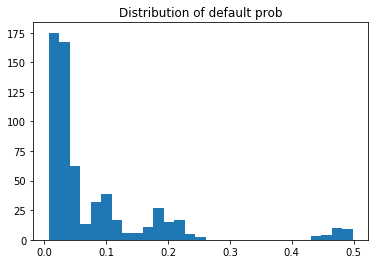

In [24]:
# Loop through the industries. Collect default probability
default_ind =[]
for idx, total in industries.iteritems():
    # Determine the number of bankruptcies and calculate default probability
    default_prob = 0
    if total > 0:
        counts = pd.value_counts(data.loc[data["industry_desc"] == idx,["bankrupt"]]["bankrupt"])
        default_prob = counts.values[-1]/np.sum(counts.values)
    #print("Industry: {}  Observations: {}  Default prob: {}".format(idx, total, default_prob))
    default_ind.append(default_prob)
    
# Distribution of default probabilities by industry
plt.hist(default_ind, bins='auto')  # arguments are passed to np.histogram
plt.title("Distribution of default prob")
plt.show()

In [12]:
data["industry_score"]=""
for idx, total in industries.iteritems():
    subdata = data.loc[data["industry_desc"] == idx][["bankrupt"]]
    # Determine the number of bankruptcies and calculate default probability
    default_prob = 0
    if total > 0:
        counts = pd.value_counts(subdata["bankrupt"]).multiply(1./total)
        default_prob = counts.values[-1]
    if default_prob < 0.05:
        data.loc[data["industry_desc"] == idx, ["industry_score"]] = "A"
    elif default_prob < 0.15:
        data.loc[data["industry_desc"] == idx, ["industry_score"]] = "B"
    elif default_prob < 0.3:
        data.loc[data["industry_desc"] == idx, ["industry_score"]] = "C"
    else:
        data.loc[data["industry_desc"] == idx, ["industry_score"]] = "D"

In [13]:
data.head(30)

,num_employees,country,industry_desc,A_score,B_score,C_score,D_score,revenue2014,revenue2015,revenue2016,bankrupt,industry_score
0,50253,CN,Nonscheduled Chartered Freight Air Transportat...,3.0,3.0,3.0,3.0,108,396,629,0,A
1,1847,CN,Offices of Real Estate Appraisers,2.0,2.0,4.0,NaN,956,647,513,0,A
2,16184,CN,Nuclear Electric Power Generation,3.0,4.0,NaN,4.0,901,1930,3022,0,A
3,25,TR,Ready-Mix Concrete Manufacturing,2.0,2.0,2.0,NaN,11267,7787,6598,0,A
4,4968,CN,Motor Vehicle Electrical and Electronic Equipm...,NaN,3.0,2.0,5.0,2481,4512,9195,1,A
5,130,NL,Soft Drink Manufacturing,1.0,2.0,2.0,2.0,5156,11615,16452,0,C
6,11,NL,Aluminum Foundries (except Die-Casting),4.0,3.0,2.0,3.0,180,649,863,0,A
7,266,EN,Cemeteries and Crematories,2.0,NaN,2.0,1.0,10325,14439,15714,0,A
8,23,NL,Flour Milling,5.0,4.0,2.0,4.0,2021,4595,12109,0,C
9,13,US,Other Social Advocacy Organizations,5.0,4.0,5.0,4.0,859,705,400,0,A
